In [1]:
from ast import Import

import os
from PIL import Image
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Loading the image data by mounting the drive and providing the path of a
folder stored in drive.

In [2]:
input_dir= '/content/drive/MyDrive/Colab Notebooks/cats_dogs (1)'

In [3]:
#Displaying the Image
categories= ['cats', 'dogs']
for i in categories:
  for file in os.listdir(os.path.join(input_dir, i)):
    img_path= os.path.join(input_dir, i,file)
    print(img_path)

/content/drive/MyDrive/Colab Notebooks/cats_dogs (1)/cats/cat.943.jpg
/content/drive/MyDrive/Colab Notebooks/cats_dogs (1)/cats/cat.916.jpg
/content/drive/MyDrive/Colab Notebooks/cats_dogs (1)/cats/cat.875.jpg
/content/drive/MyDrive/Colab Notebooks/cats_dogs (1)/cats/cat.938.jpg
/content/drive/MyDrive/Colab Notebooks/cats_dogs (1)/cats/cat.910.jpg
/content/drive/MyDrive/Colab Notebooks/cats_dogs (1)/cats/cat.917.jpg
/content/drive/MyDrive/Colab Notebooks/cats_dogs (1)/cats/cat.972.jpg
/content/drive/MyDrive/Colab Notebooks/cats_dogs (1)/cats/cat.971.jpg
/content/drive/MyDrive/Colab Notebooks/cats_dogs (1)/cats/cat.888.jpg
/content/drive/MyDrive/Colab Notebooks/cats_dogs (1)/cats/cat.947.jpg
/content/drive/MyDrive/Colab Notebooks/cats_dogs (1)/cats/cat.921.jpg
/content/drive/MyDrive/Colab Notebooks/cats_dogs (1)/cats/cat.783.jpg
/content/drive/MyDrive/Colab Notebooks/cats_dogs (1)/cats/cat.913.jpg
/content/drive/MyDrive/Colab Notebooks/cats_dogs (1)/cats/cat.957.jpg
/content/drive/MyDri

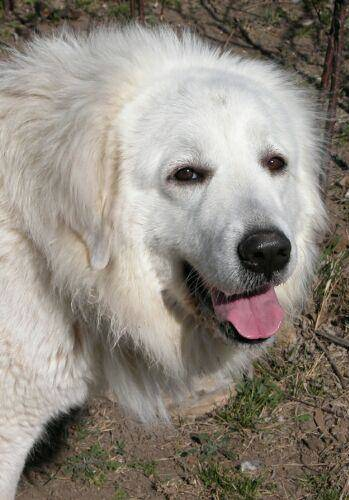

In [62]:
Image.open('/content/drive/MyDrive/Colab Notebooks/cats_dogs (1)/dogs/dog.215.jpg')

#Image conversion to array

In [5]:
img_path= "/content/drive/MyDrive/Colab Notebooks/cats_dogs (1)/cats/cat.21.jpg"

In [6]:
img= imread(img_path)
img


array([[[187, 147,  95],
        [180, 143,  91],
        [176, 138,  89],
        ...,
        [240, 231, 166],
        [248, 245, 178],
        [254, 255, 187]],

       [[185, 145,  93],
        [181, 144,  92],
        [180, 142,  93],
        ...,
        [240, 231, 166],
        [247, 244, 177],
        [253, 254, 186]],

       [[185, 145,  93],
        [182, 145,  92],
        [183, 146,  94],
        ...,
        [243, 235, 172],
        [247, 243, 179],
        [250, 251, 185]],

       ...,

       [[ 62,  33,  17],
        [ 57,  30,  13],
        [ 55,  26,  10],
        ...,
        [207, 203, 204],
        [197, 195, 196],
        [193, 189, 190]],

       [[ 63,  34,  16],
        [ 58,  29,  11],
        [ 54,  25,   7],
        ...,
        [204, 202, 203],
        [198, 196, 197],
        [193, 191, 192]],

       [[ 64,  35,  17],
        [ 58,  29,  11],
        [ 54,  25,   7],
        ...,
        [203, 201, 202],
        [199, 197, 198],
        [195, 193, 194]]

In [7]:
#Resizing and flattening the numpy array.

img= resize(img,(15,15))

In [9]:
img=img.flatten()
img

array([0.74985584, 0.61033255, 0.40259947, 0.76336777, 0.62001507,
       0.4163447 , 0.79343428, 0.65627192, 0.47885473, 0.83778643,
       0.68638913, 0.503048  , 0.84964406, 0.69645   , 0.51651776,
       0.86459571, 0.71110362, 0.5255985 , 0.89095009, 0.7324525 ,
       0.54365638, 0.92802181, 0.78538335, 0.60489251, 0.96233906,
       0.83684577, 0.62690315, 0.97036853, 0.88445433, 0.64585146,
       0.96811122, 0.92086343, 0.69929661, 0.96785985, 0.90918049,
       0.67868884, 0.9319938 , 0.81579635, 0.56441835, 0.62513932,
       0.49803537, 0.36129804, 0.6553541 , 0.53269572, 0.36420609,
       0.74048584, 0.59334675, 0.3764251 , 0.76881078, 0.6230073 ,
       0.42477306, 0.78117186, 0.64165989, 0.45742564, 0.84672439,
       0.69419924, 0.50974349, 0.88103243, 0.72804963, 0.55080533,
       0.87911643, 0.7201187 , 0.53417828, 0.88423294, 0.72428039,
       0.53648493, 0.89800767, 0.77899503, 0.63328195, 0.94971349,
       0.83076474, 0.6406236 , 0.94956197, 0.84541096, 0.62759

In [14]:
#creating empty list
data=[]
labels=[]

Converting all the images into a
1-D array and storing it into data
variable. Here Label contains
two categories i.e 0 (Cat) and
1 (Dog)

In [15]:
for category_idx, category in enumerate(categories):
  for file in os.listdir(os.path.join(input_dir, category)):
    img_path= os.path.join(input_dir, category,file)
    img=imread(img_path)
    img=resize(img,(15,15))
    data.append(img.flatten())
    labels.append(category_idx)

In [16]:
import numpy as np
labels= np.asarray(labels)
data= np.asarray(data)

Model building

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(data, labels, test_size= 0.2, shuffle= True, stratify= labels)


In [21]:
#standardisation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data=sc.fit_transform(data)

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_predlr=lr.predict(x_test)
y_predlr

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,

In [36]:
accuracy_score(y_test,y_predlr)

0.5895522388059702

Accuracy obtained by logistic regression is 58 percent.

Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [34]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
y_pred_dt= dt.predict(x_test)
y_pred_dt

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,

In [38]:
accuracy_score(y_test,y_pred_dt)

0.6094527363184079

Accuracy obtained by decision tree model is 60 percent.

Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf=RandomForestClassifier(n_estimators= 100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,

In [43]:
accuracy_score(y_test,y_pred_rf)

0.6218905472636815

Hyperparameter Tuning - Random Forest

In [44]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid= {'n_estimators': [200,500],
             'criterion':  ['gini', 'entropy'],
             'max_depth': [4,5,6,7,8],
             'max_features': ['sqrt', 'auto', 'log2'],
}

In [54]:
best_param=GridSearchCV(rf,param_grid= param_grid, cv=5)
best_param

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'n_estimators': [200, 500]})

In [56]:
best_param.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

KeyboardInterrupt: ignored

In [ ]:
best_param.best_param_

In [ ]:
rf1=RandomForestClassifier(n_estimators= 100, criterion=, max_depth= ,max_features= )
rf1.fit(x_train,y_train)

In [ ]:
y_pred_rf1=rf1.predict(x_test)
y_pred_rf1

In [ ]:
accuracy_score(y_test,y_pred_rf1)

Accuracy obtained by random forest model is 65.5 percent.

In [59]:
import pandas as pd
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,1
4,0,0
...,...,...
397,1,1
398,1,0
399,0,0
400,0,0
